In [1]:
# imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.colors as colorss
from datetime import timedelta
import xesmf as xe

In [2]:
from config import directory_figs, directory_data

In [3]:
lhflx_g02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.cam.h0.LHFLX.*.nc'
lhflx_g04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.cam.h0.LHFLX.*.nc'
lhflx_p02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.cam.h0.LHFLX.*.nc'
lhflx_p04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.cam.h0.LHFLX.*.nc'
lhflx_psalt = 'b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.cam.h0.LHFLX.*.nc'
lhflx_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.LHFLX.*.nc'

precc_g02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.cam.h0.PRECC.*.nc'
precc_g04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.cam.h0.PRECC.*.nc'
precc_p02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.cam.h0.PRECC.*.nc'
precc_p04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.cam.h0.PRECC.*.nc'
precc_psalt = 'b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.cam.h0.PRECC.*.nc'
precc_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.PRECC.*.nc'

precl_g02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.cam.h0.PRECL.*.nc'
precl_g04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.cam.h0.PRECL.*.nc'
precl_p02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.cam.h0.PRECL.*.nc'
precl_p04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.cam.h0.PRECL.*.nc'
precl_psalt = 'b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.cam.h0.PRECL.*.nc'
precl_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.PRECL.*.nc'

In [4]:
%%capture

# open
ds_g02sv = xr.open_mfdataset(f'{directory_data}{lhflx_g02sv}', combine='by_coords')
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
# grab lat lon for later
lat = ds_g02sv['lat'].values
lon = ds_g02sv['lon'].values
# extract amoc collapse period
lhflx_g02sv = ds_g02sv['LHFLX'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_g04sv = xr.open_mfdataset(f'{directory_data}{lhflx_g04sv}', combine='by_coords')
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
lhflx_g04sv = ds_g04sv['LHFLX'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_p02sv = xr.open_mfdataset(f'{directory_data}{lhflx_p02sv}', combine='by_coords')
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
lhflx_p02sv = ds_p02sv['LHFLX'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_p04sv = xr.open_mfdataset(f'{directory_data}{lhflx_p04sv}', combine='by_coords')
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
lhflx_p04sv = ds_p04sv['LHFLX'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_psalt = xr.open_mfdataset(f'{directory_data}{lhflx_psalt}', combine='by_coords')
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
lhflx_psalt = ds_psalt['LHFLX'].sel(time=slice(cftime.DatetimeNoLeap(
    101, 1, 1, 0, 0),cftime.DatetimeNoLeap(251, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_cntrl = xr.open_mfdataset(f'{directory_data}{lhflx_cntrl}', combine='by_coords')
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
lhflx_cntrl = ds_cntrl['LHFLX'].sel(time=slice(cftime.DatetimeNoLeap(
    800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1600, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

In [5]:
%%capture

# open
ds_g02sv = xr.open_mfdataset(f'{directory_data}{precc_g02sv}', combine='by_coords')
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
# extract amoc collapse period
precc_g02sv = ds_g02sv['PRECC'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_g04sv = xr.open_mfdataset(f'{directory_data}{precc_g04sv}', combine='by_coords')
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
precc_g04sv = ds_g04sv['PRECC'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_p02sv = xr.open_mfdataset(f'{directory_data}{precc_p02sv}', combine='by_coords')
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
precc_p02sv = ds_p02sv['PRECC'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_p04sv = xr.open_mfdataset(f'{directory_data}{precc_p04sv}', combine='by_coords')
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
precc_p04sv = ds_p04sv['PRECC'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_psalt = xr.open_mfdataset(f'{directory_data}{precc_psalt}', combine='by_coords')
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
precc_psalt = ds_psalt['PRECC'].sel(time=slice(cftime.DatetimeNoLeap(
    101, 1, 1, 0, 0),cftime.DatetimeNoLeap(251, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_cntrl = xr.open_mfdataset(f'{directory_data}{precc_cntrl}', combine='by_coords')
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
precc_cntrl = ds_cntrl['PRECC'].sel(time=slice(cftime.DatetimeNoLeap(
    800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1600, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

In [6]:
%%capture

# open
ds_g02sv = xr.open_mfdataset(f'{directory_data}{precl_g02sv}', combine='by_coords')
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
# extract amoc collapse period
precl_g02sv = ds_g02sv['PRECL'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_g04sv = xr.open_mfdataset(f'{directory_data}{precl_g04sv}', combine='by_coords')
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
precl_g04sv = ds_g04sv['PRECL'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_p02sv = xr.open_mfdataset(f'{directory_data}{precl_p02sv}', combine='by_coords')
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
precl_p02sv = ds_p02sv['PRECL'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_p04sv = xr.open_mfdataset(f'{directory_data}{precl_p04sv}', combine='by_coords')
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
precl_p04sv = ds_p04sv['PRECL'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_psalt = xr.open_mfdataset(f'{directory_data}{precl_psalt}', combine='by_coords')
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
precl_psalt = ds_psalt['PRECL'].sel(time=slice(cftime.DatetimeNoLeap(
    101, 1, 1, 0, 0),cftime.DatetimeNoLeap(251, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_cntrl = xr.open_mfdataset(f'{directory_data}{precl_cntrl}', combine='by_coords')
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
precl_cntrl = ds_cntrl['PRECL'].sel(time=slice(cftime.DatetimeNoLeap(
    800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1600, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

In [7]:
# converting LHFLX to EVAP rate in mm/day
# divide by latent heat of vaporization (2.501e6 J/kg)
# and divide by fresh water density (1000 kg/m3)
# then convert m/s to mm/day (1 m/s = 8.64e7 mm/day)

evap_g02sv = ((lhflx_g02sv / 2.501e6) / 1000) * 8.64e7
evap_g04sv = ((lhflx_g04sv / 2.501e6) / 1000) * 8.64e7
evap_p02sv = ((lhflx_p02sv / 2.501e6) / 1000) * 8.64e7
evap_p04sv = ((lhflx_p04sv / 2.501e6) / 1000) * 8.64e7
evap_psalt = ((lhflx_psalt / 2.501e6) / 1000) * 8.64e7
evap_cntrl = ((lhflx_cntrl / 2.501e6) / 1000) * 8.64e7

In [8]:
# add convective precipitation (PRECC) and large-scale precipitation (PRECL)
# convert m/s to mm/day (1 m/s = 8.64e7 mm/day)

precip_g02sv = (precc_g02sv + precl_g02sv) * 8.64e7
precip_g04sv = (precc_g04sv + precl_g04sv) * 8.64e7
precip_p02sv = (precc_p02sv + precl_p02sv) * 8.64e7
precip_p04sv = (precc_p04sv + precl_p04sv) * 8.64e7
precip_psalt = (precc_psalt + precl_psalt) * 8.64e7
precip_cntrl = (precc_cntrl + precl_cntrl) * 8.64e7

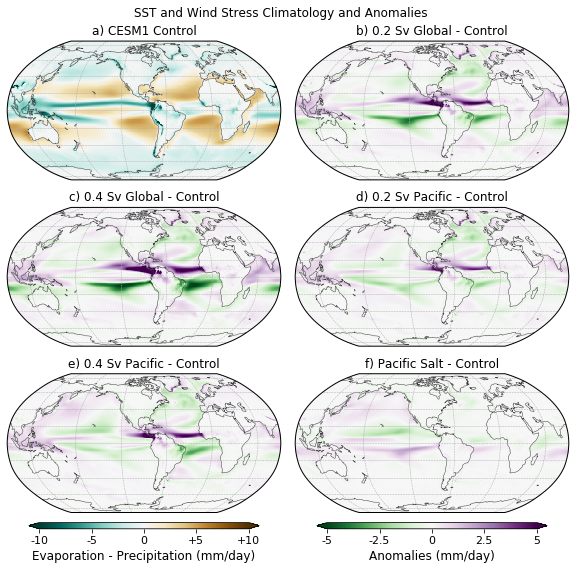

In [22]:
# -------------- figure creation

a = u"\u00b0"
vanom1=-5
vanom2=5

fig = plt.figure(figsize=(8,7))

fig.suptitle('SST and Wind Stress Climatology and Anomalies', fontsize=12, x=0.475, y=1.03)

# --------------

ax1 = plt.axes([0., 0.66, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax1.set_title('a) CESM1 Control', fontsize=12)

data, lons = add_cyclic_point(evap_cntrl - precip_cntrl, coord=lon)
cs1 = ax1.pcolormesh(lons, lat, data, cmap='BrBG_r', vmin=-10, vmax=10, transform=ccrs.PlateCarree())

ax1.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax1.add_feature(cartopy.feature.LAND, facecolor='0.6')
ax1.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax2 = plt.axes([0.5, 0.66, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax2.set_title('b) 0.2 Sv Global - Control', fontsize=12)

data, lons = add_cyclic_point((evap_g02sv - precip_g02sv) - (evap_cntrl - precip_cntrl), coord=lon)
cs2 = ax2.pcolormesh(lons, lat, data, cmap='PRGn_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

ax2.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax2.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax2.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax3 = plt.axes([0., 0.33, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax3.set_title('c) 0.4 Sv Global - Control', fontsize=12)

data, lons = add_cyclic_point((evap_g04sv - precip_g04sv) - (evap_cntrl - precip_cntrl), coord=lon)
ax3.pcolormesh(lons, lat, data, cmap='PRGn_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

ax3.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax3.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax3.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax4 = plt.axes([0.5, 0.33, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax4.set_title('d) 0.2 Sv Pacific - Control', fontsize=12)

data, lons = add_cyclic_point((evap_p02sv - precip_p02sv) - (evap_cntrl - precip_cntrl), coord=lon)
ax4.pcolormesh(lons, lat, data, cmap='PRGn_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

ax4.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax4.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax4.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax5 = plt.axes([0., 0., 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax5.set_title('e) 0.4 Sv Pacific - Control', fontsize=12)

data, lons = add_cyclic_point((evap_p04sv - precip_p04sv) - (evap_cntrl - precip_cntrl), coord=lon)
ax5.pcolormesh(lons, lat, data, cmap='PRGn_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

ax5.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax5.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax5.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax6 = plt.axes([0.5, 0., 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax6.set_title('f) Pacific Salt - Control', fontsize=12)

data, lons = add_cyclic_point((evap_psalt - precip_psalt) - (evap_cntrl - precip_cntrl), coord=lon)
ax6.pcolormesh(lons, lat, data, cmap='PRGn_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

ax6.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax6.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax6.gridlines(linestyle='--', linewidth=0.5)

# -------------- colorbars

cbar_ax = fig.add_axes([0.0375, -0.005, 0.4, 0.0125])
ticks_1 = [-10,-5,0,5,10]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.ax.set_xticklabels(['-10','-5','0','+5','+10'])
cbar.ax.tick_params(labelsize=11)
cbar.set_label(r'Evaporation - Precipitation (mm/day)', fontsize=12)

# --------------

cbar_ax = fig.add_axes([0.5375, -0.005, 0.4, 0.0125])
ticks_1 = [-5,-2.5,0,2.5,5]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.ax.set_xticklabels([-5,-2.5,0,2.5,5])
cbar.ax.tick_params(labelsize=11)
cbar.set_label(r'Anomalies (mm/day)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig_epanom.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------

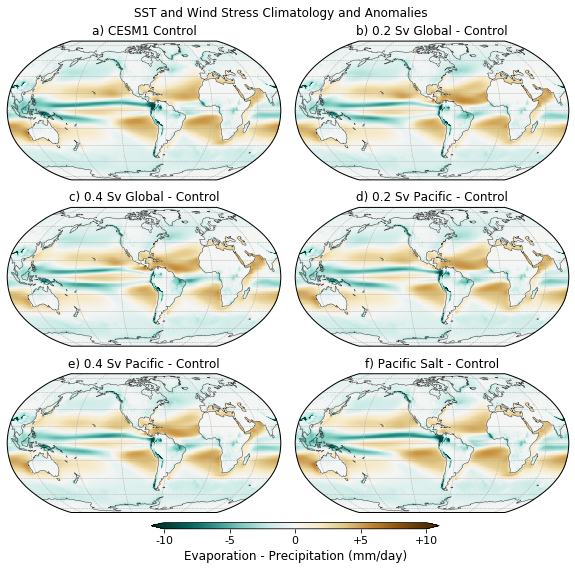

In [23]:
# -------------- figure creation

a = u"\u00b0"
vanom1=-10
vanom2=10

fig = plt.figure(figsize=(8,7))

fig.suptitle('SST and Wind Stress Climatology and Anomalies', fontsize=12, x=0.475, y=1.03)

# --------------

ax1 = plt.axes([0., 0.66, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax1.set_title('a) CESM1 Control', fontsize=12)

data, lons = add_cyclic_point(evap_cntrl - precip_cntrl, coord=lon)
cs1 = ax1.pcolormesh(lons, lat, data, cmap='BrBG_r', vmin=-10, vmax=10, transform=ccrs.PlateCarree())

ax1.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax1.add_feature(cartopy.feature.LAND, facecolor='0.6')
ax1.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax2 = plt.axes([0.5, 0.66, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax2.set_title('b) 0.2 Sv Global - Control', fontsize=12)

data, lons = add_cyclic_point(evap_g02sv - precip_g02sv, coord=lon)
ax2.pcolormesh(lons, lat, data, cmap='BrBG_r', vmin=-10, vmax=10, transform=ccrs.PlateCarree())

ax2.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax2.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax2.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax3 = plt.axes([0., 0.33, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax3.set_title('c) 0.4 Sv Global - Control', fontsize=12)

data, lons = add_cyclic_point(evap_g04sv - precip_g04sv, coord=lon)
ax3.pcolormesh(lons, lat, data, cmap='BrBG_r', vmin=-10, vmax=10, transform=ccrs.PlateCarree())

ax3.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax3.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax3.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax4 = plt.axes([0.5, 0.33, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax4.set_title('d) 0.2 Sv Pacific - Control', fontsize=12)

data, lons = add_cyclic_point(evap_p02sv - precip_p02sv, coord=lon)
ax4.pcolormesh(lons, lat, data, cmap='BrBG_r', vmin=-10, vmax=10, transform=ccrs.PlateCarree())

ax4.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax4.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax4.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax5 = plt.axes([0., 0., 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax5.set_title('e) 0.4 Sv Pacific - Control', fontsize=12)

data, lons = add_cyclic_point(evap_p04sv - precip_p04sv, coord=lon)
ax5.pcolormesh(lons, lat, data, cmap='BrBG_r', vmin=-10, vmax=10, transform=ccrs.PlateCarree())

ax5.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax5.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax5.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax6 = plt.axes([0.5, 0., 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax6.set_title('f) Pacific Salt - Control', fontsize=12)

data, lons = add_cyclic_point(evap_psalt - precip_psalt, coord=lon)
ax6.pcolormesh(lons, lat, data, cmap='BrBG_r', vmin=-10, vmax=10, transform=ccrs.PlateCarree())

ax6.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax6.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax6.gridlines(linestyle='--', linewidth=0.5)

# -------------- colorbars

cbar_ax = fig.add_axes([0.25, -0.005, 0.5, 0.0125])
ticks_1 = [-10,-5,0,5,10]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.ax.set_xticklabels(['-10','-5','0','+5','+10'])
cbar.ax.tick_params(labelsize=11)
cbar.set_label(r'Evaporation - Precipitation (mm/day)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig_ep.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------